# Pymaceuticals Inc.
Tumor Volume vs. Time for a Specific Mouse:

Tumor Volume Change Over Time for Mouse l509: We observed how the tumor volume for mouse l509 changes over time. The tumor volume steadily increases during the course of Capomulin treatment. Such plots help us visualize the rate of tumor growth throughout the treatment period.
Correlation Between Mouse Weight and Tumor Volume:

Capomulin Treatment - Mouse Weight and Average Tumor Volume: There is an observed relationship between the mouse weight and the average tumor volume for mice treated with Capomulin.
As mouse weight increases, the average tumor volume also increases. The correlation coefficient of 0.84 indicates a strong positive relationship between these two variables. This suggests that as the weight of the mice increases, the tumor volume tends to increase as well.
Linear Regression Analysis: The linear regression analysis confirms the positive trend between mouse weight and tumor volume. The regression line shows that as the weight increases, the tumor volume also increases. This type of analysis helps in understanding how the treatment responds in relation to the body size of the mice.
This analysis emphasizes how the Capomulin treatment affects tumor growth and how mouse weight correlates with tumor size. The strong positive correlation indicates that heavier mice tend to have larger tumors under the same treatment, and the regression analysis further supports this relationship.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
(combined_data.head())



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate mice
(duplicate_mice)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:

# Get the duplicate Mouse IDs
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Filter the combined DataFrame to get all data for the duplicate Mouse IDs
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for the duplicate mouse IDs
(duplicate_mouse_data)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mice
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the cleaned DataFrame
(cleaned_data)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
import pandas as pd

# Example of merging two DataFrames
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Check the number of unique mice
unique_mice_count = clean_df['Mouse ID'].nunique()
print(f"Number of unique mice in the clean DataFrame: {unique_mice_count}")

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [24]:
 import pandas as pd
from scipy import stats

# Calculate summary statistics for tumor volume by drug regimen
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: stats.sem(x)  # Calculate SEM using scipy's sem function
).reset_index()

# Display the summary statistics DataFrame
(summary_stats)



,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [23]:
import pandas as pd
from scipy import stats

# Load the datasets with the correct full path
mouse_metadata = pd.read_csv('C:/Users/zilan/DataClass/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv')  # Ensure the file extension is .csv
study_results = pd.read_csv('C:/Users/zilan/DataClass/Starter_Code/Pymaceuticals/data/Study_results.csv')  # Ensure the file extension is .csv

# Merge the DataFrames on a common column
clean_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Check the merged DataFrame
(clean_df.head())
(clean_df.columns)  

# Generate summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean= 'mean',
    median= 'median',
    variance= 'var',
    std_dev='std',
    sem= lambda x: stats.sem(x)  # Calculate SEM using scipy's sem function
).reset_index()

# Display the summary statistics DataFrame
(summary_stats)

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

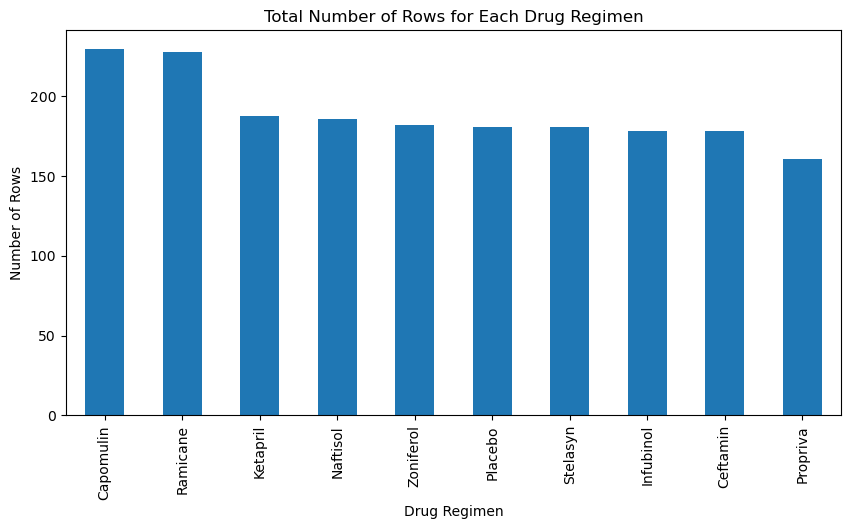

In [42]:


drug_counts =clean_df['Drug Regimen'].value_counts()

# Create the first bar chart using Pandas
drug_counts.plot(kind='bar', figsize=(10, 5), title='Total Number of Rows for Each Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Rows')
plt.show()  # Show the Pandas plot

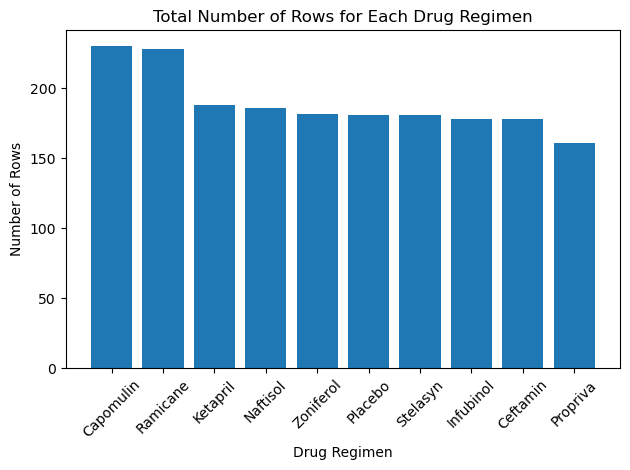

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index.values, drug_counts)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


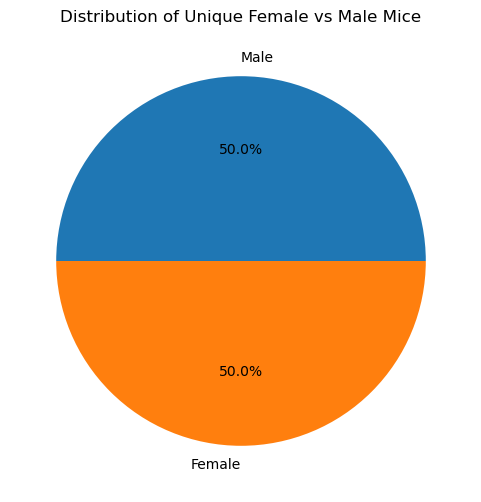

,Mouse ID,Gender
0,G1,Male
1,G2,Female
2,G3,Male
3,G4,Female
4,G5,Male
5,G6,Female
6,G7,Male
7,G8,Female


In [49]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Sample data
data = {
    'Mouse ID': ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
}

# Create DataFrame
df = pd.DataFrame(data)

# Count unique mice by gender
gender_counts = df['Gender'].value_counts()

# Create pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='', title='Distribution of Unique Female vs Male Mice', figsize=(6, 6))
plt.show()
# Get the unique mice with their gender

# Get unique mice with their gender
unique_mice = df[['Mouse ID', 'Gender']].drop_duplicates()

# Display the unique mice
(unique_mice)
# Make the pie chart


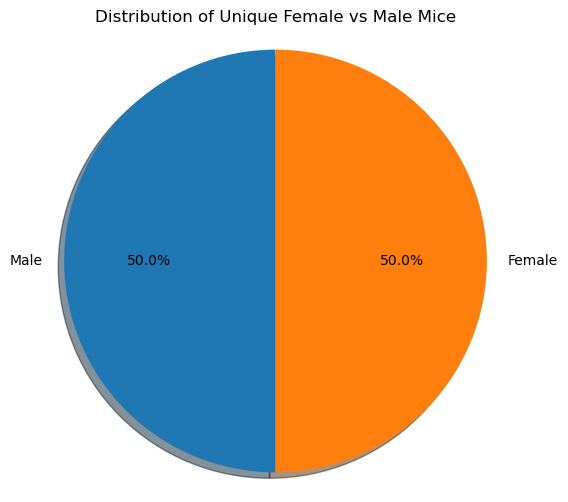

In [50]:


# Sample data
data = {
    'Mouse ID': ['G1', 'G2', 'G3', 'G1', 'G4', 'G5', 'G6', 'G2'],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female']
}

# Create DataFrame
df = pd.DataFrame(data)

# Get unique mice with their gender
unique_mice = df[['Mouse ID', 'Gender']].drop_duplicates()

# Count unique mice by gender
gender_counts = unique_mice['Gender'].value_counts()

# Make the pie chart using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Unique Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
import pandas as pd

# Assuming 'clean_df' is your original cleaned DataFrame
# and it contains columns 'Mouse ID', 'Timepoint', and 'Tumor Volume'

# Step 1: Create a grouped DataFrame to get the last time point for each mouse
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge the grouped DataFrame with the original DataFrame to get tumor volumes
merged_df = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'])

# Now 'merged_df' contains the last time point and the corresponding tumor volume for each mouse
# You can filter this DataFrame to include only the four treatment regimens
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = merged_df[merged_df['Drug Regimen'].isin(treatment_list)]



In [80]:
# Check the columns in the DataFrame
print("Columns in the DataFrame:", cleaned_data.columns)

# Step 1: Put treatments into a list for the loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Step 3: Loop through each treatment to calculate IQR and identify outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = cleaned_data.loc[cleaned_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the subset of tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"{treatment} - IQR: {IQR:.2f}, Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}, Outliers: {outliers.tolist()}")

# Now tumor_vol_data contains the tumor volumes for each treatment, and you have identified outliers for each treatment


Columns in the DataFrame: Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')
Capomulin - IQR: 7.31, Lower Bound: 26.71, Upper Bound: 55.97, Outliers: [25.47214326, 23.34359787]
Ramicane - IQR: 8.33, Lower Bound: 24.19, Upper Bound: 57.49, Outliers: [22.05012627]
Infubinol - IQR: 10.00, Lower Bound: 32.31, Upper Bound: 72.32, Outliers: []
Ceftamin - IQR: 9.59, Lower Bound: 32.82, Upper Bound: 71.19, Outliers: []


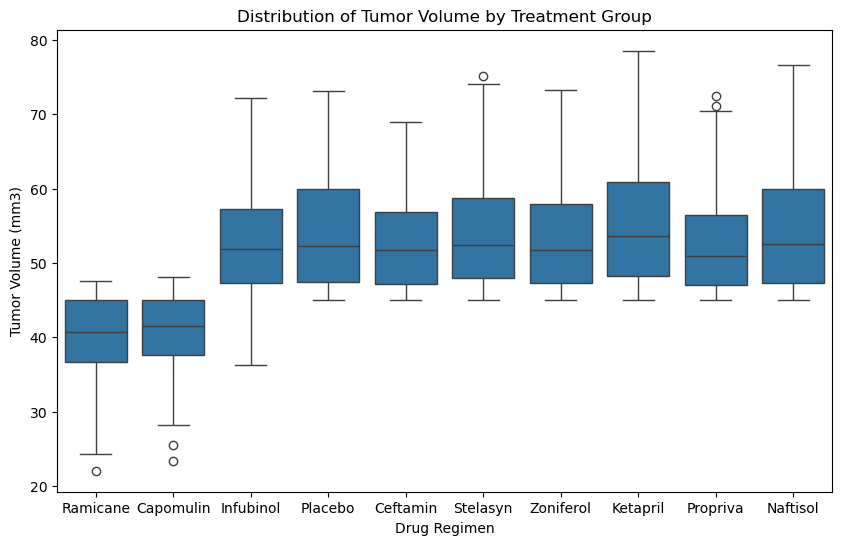

In [79]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cleaned_data is your DataFrame containing the tumor volume and treatment regimen
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=cleaned_data)

# Set the title and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

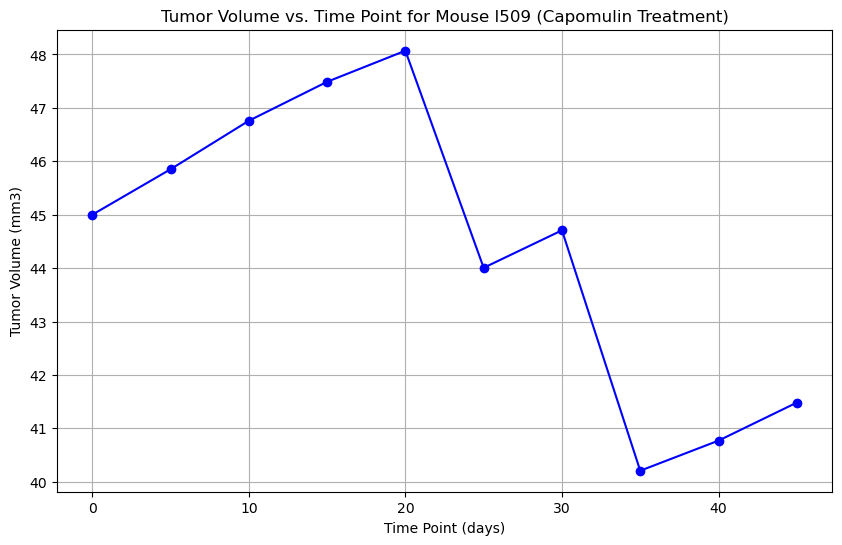

In [95]:
import matplotlib.pyplot as plt

# Filter the DataFrame for a specific mouse treated with Capomulin
# Replace 'l509' with the actual ID of the mouse you want to plot
mouse_id = 'l509'  # Example: 'b128'
mouse_data = cleaned_data[cleaned_data['Mouse ID'] == mouse_id]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid()
plt.show()


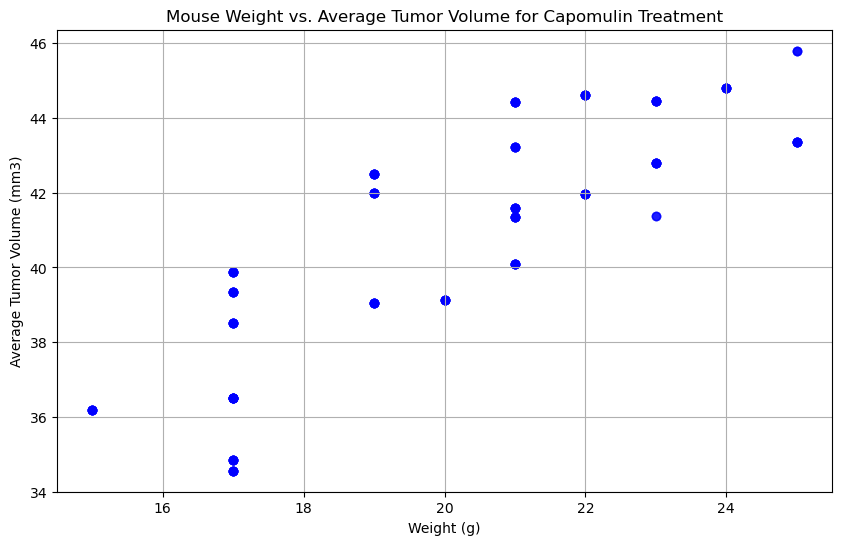

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter the DataFrame for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with the mouse weight data
# Assuming 'Weight (g)' is the column name for mouse weight
merged_data = average_tumor_volume.merge(capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', alpha=0.5)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid()
plt.show()

## Correlation and Regression

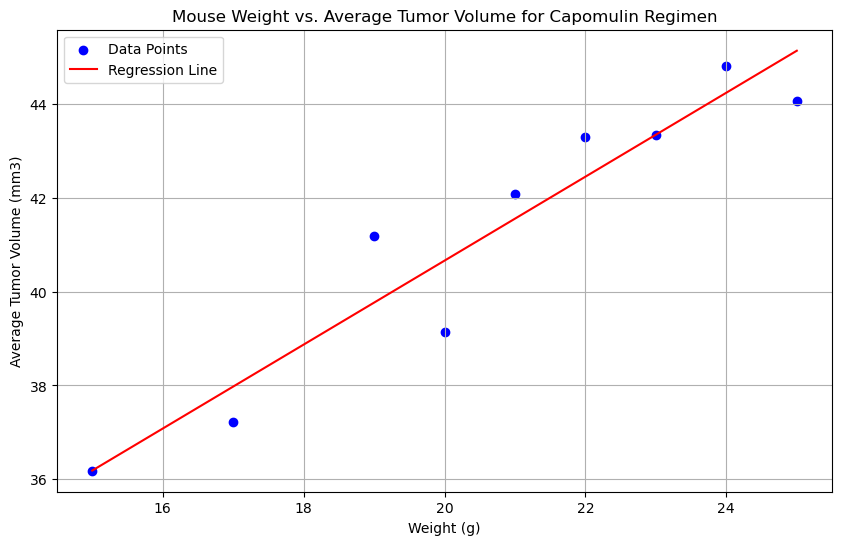

In [90]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Filter the DataFrame for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group by mouse weight and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Rename the columns for better clarity
avg_tumor_volume.columns = ['Weight (g)', 'Average Tumor Volume (mm3)']

# Display the resulting DataFrame
(avg_tumor_volume)

# Calculate the correlation coefficient
correlation = avg_tumor_volume['Weight (g)'].corr(avg_tumor_volume['Average Tumor Volume (mm3)'])
(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Average Tumor Volume (mm3)'])

# Print the results of the linear regression
(f"Linear regression results:\nSlope: {slope:.2f}\nIntercept: {intercept:.2f}\nR-squared: {r_value**2:.2f}")

# Create a scatter plot with the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Average Tumor Volume (mm3)'], color='b', marker='o', label='Data Points')
plt.plot(avg_tumor_volume['Weight (g)'], intercept + slope * avg_tumor_volume['Weight (g)'], color='r', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid()
plt.show()